# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Create a text file for the summary analysis and conclusions - Is this needed?
#file_to_output = os.path.join(".", "Analysis","Pymaceuticals_analysis.txt")

# Study data files 
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Create the dataframe called mouse_data_complete.  This dataframe has all data from both original csv metadata files
#Output shows the top 5 rows and last 5 rows of the datas
mousestudy_data_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousestudy_data_complete_df

# print(mousestudy_data_complete_df.columns) - use this to check the spelling and names of all the columns in the complete df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(mousestudy_data_complete_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_data_complete_df.loc[mousestudy_data_complete_df.duplicated(subset=["Mouse ID", "Timepoint"])]

# This output shows that mouse ID g989 had duplicated data, that is multiple rows of data reported for all the columns for only the timepoints 0, 5, 10, 15 and 20


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Question to reviewer -- The homework original jupyter notebook showed this response as array([]g989'], dtype=object.  My code returns the dtype as string.  Is this the same thing?

# Check for duplicate timepoints for each ID
duplicates = mousestudy_data_complete_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Filter the dataframe to only include the duplicated timepoints
duplicate_data = mousestudy_data_complete_df[duplicates]

# Get the unique IDs with duplicates
duplicate_ids = duplicate_data['Mouse ID'].unique()

# Return the list of duplicate IDs and their data type
print(duplicate_ids, type(duplicate_ids[0]))

['g989'] <class 'str'>


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

# Define the Mouse ID for which you want to print the all the rows of data
target_id = 'g989'

# Filter the dataframe to only include the rows with the target Mouse ID
target_rows = mousestudy_data_complete_df[mousestudy_data_complete_df['Mouse ID'] == 'g989']

# Print the rows with the target ID
print(target_rows)

# THis prints all the duplicate data and the non-duplicated data for all timepoints for the Mouse ID g989

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = mousestudy_data_complete_df[mousestudy_data_complete_df['Mouse ID'] != 'g989']
print(clean_data)

# 1880 is the expected numebr of rows.  That is the full 1893 rows minus the 13 rows (duplicated and not duplicated timepoints) for mouse g989.

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

# This is the full number of subjects (249) minus the 1 excluded mouse.

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the "clean_data" dataframe by drug Regimen
grouped = clean_data.groupby('Drug Regimen')

# Calculate summary statistics for each drug regimen
summary_tumorvolume = grouped['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

# Rename the columns
summary_tumorvolume.rename(columns={'mean': 'Mean',
                        'median': 'Median',
                        'var': 'Variance',
                        'std': 'Standard Deviation',
                        'sem': 'Standard Error of the Mean'}, inplace=True)

print(summary_tumorvolume)



                   Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.320930  50.446266  43.852013            6.622085   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error of the Mean  
Drug Regimen                              
Capomulin                       0.329346  
Ceftamin                        0.469821  

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

# Group the "clean_data" dataframe by drug Regimen
grouped = clean_data.groupby('Drug Regimen')

# Calculate mean, median, and variance for the 'Volume' field
mean = clean_data['Tumor Volume (mm3)'].mean()
median = clean_data['Tumor Volume (mm3)'].median()
variance = clean_data['Tumor Volume (mm3)'].var()
stddev = clean_data['Tumor Volume (mm3)'].std()
sem = clean_data['Tumor Volume (mm3)'].sem()

print("Mean:", mean, "Median:", median, "Variance:", variance, "Standard Deviation:", stddev, "Standard Error of the Mean:", sem)

Mean: 50.43529323225536 Median: 48.933453655 Variance: 79.46290714557321 Standard Deviation: 8.91419694339166 Standard Error of the Mean: 0.20559062186986257


## Bar and Pie Charts

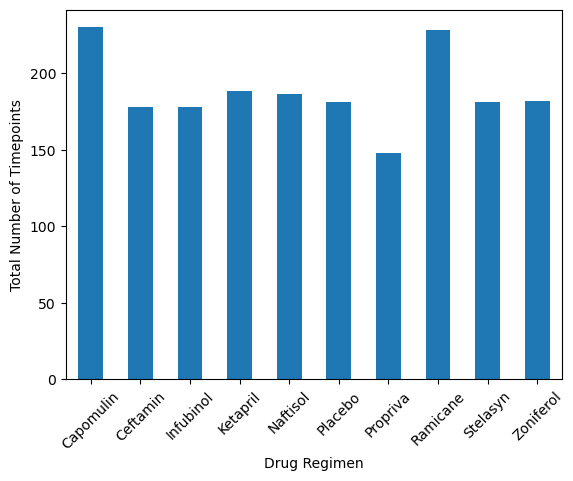

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group the dataframe by 'Drug Regimen' and calculate the total number of timepoints for each Regimen
grouped = clean_data.groupby('Drug Regimen')
group_count = grouped['Mouse ID'].count()

# Plot the bar plot
group_count.plot(kind='bar')

# Add x and y labels
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

# rotate the x-axis labels by 45 degrees to make the graph easier to read
plt.xticks(rotation=45)


# Show the plot
plt.show()

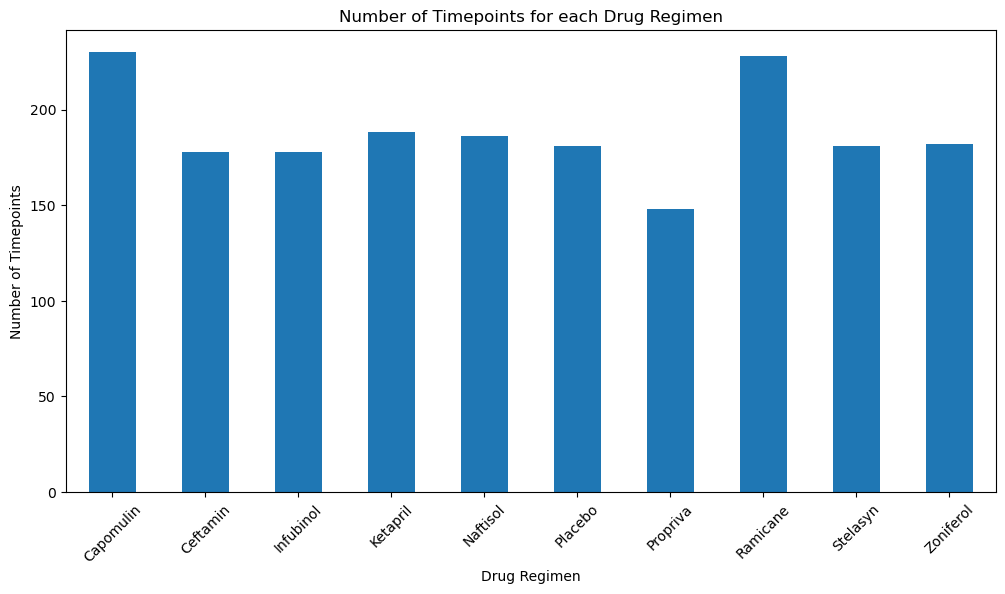

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

grouped = clean_data.groupby(['Drug Regimen'])

# Count the number of timepoints for each drug group
counts = grouped['Timepoint'].count()

# Plot the counts as a bar plot
counts.plot(kind='bar', figsize=(12,6))

# Add a title and labels to the plot
plt.title("Number of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

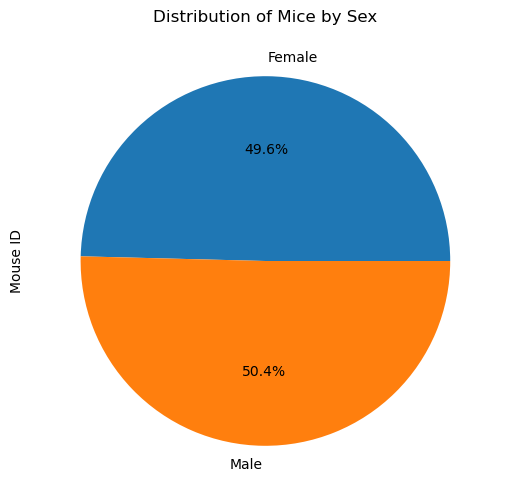

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by the 'Sex' field
grouped = clean_data.groupby(['Sex'])

# Count the number of IDs for each sex group
counts = grouped['Mouse ID'].nunique()

# Plot the counts as a pie plot
counts.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

# Add a title to the plot
plt.title("Distribution of Mice by Sex")

# Show the plot
plt.show()

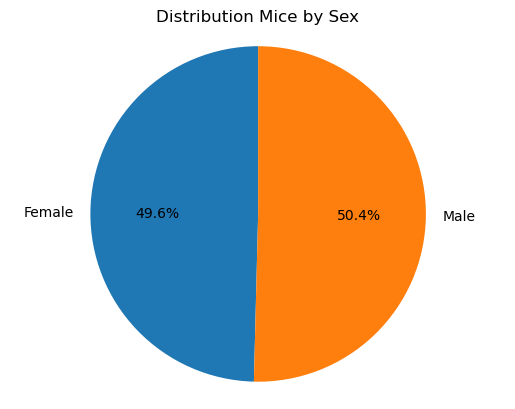

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by the 'Sex' field
grouped = clean_data.groupby(['Sex'])

# Count the number of IDs for each sex group
counts = grouped['Mouse ID'].nunique()

# Plot the counts as a pie plot
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the plot
plt.title("Distribution Mice by Sex")

# Set the aspect ratio of the plot to equal
plt.axis('equal')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# The instruction below said to use the "original" dataframe so that is 249 mice.  THis is not from the reduced clean_data df.
last_timepoint_group = mousestudy_data_complete_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# The reset_index method is used to reset the index of grouped and turn it into a column so that it can be merged with df. 
# The how argument is set to inner to only keep the rows in the merged dataframe where there is a match in both df and grouped.
merged_complete = mousestudy_data_complete_df.merge(last_timepoint_group.reset_index(), on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the dataframe so it only contains the rows for which the mask is True. This will be just the four drug regimens.
mask = merged_complete["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
filtered_drug_df = merged_complete[mask]

print(filtered_drug_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']])

# this should print fewer than the total of 249 mice because not all the mice were on the 4 drug regimens in the question.

    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
7       u153          0           45.000000     Ceftamin
8       b447          0           45.000000     Ceftamin
10      x226          0           45.000000     Ceftamin
11      t573          0           45.000000     Ceftamin
20      c326          5           36.321346    Infubinol
..       ...        ...                 ...          ...
235     a644         45           32.978522     Ramicane
241     i177         45           33.562402     Ramicane
244     r944         45           41.581521    Capomulin
245     u364         45           31.023923    Capomulin
246     p438         45           61.433892     Ceftamin

[100 rows x 4 columns]


In [15]:
# define the final_tumor_vol column from teh filtered_drug_dataframe
# final_tumor_vol = filtered_drug_df['Tumor Volume (mm3)']
# final_tumor_vol

In [34]:
drugs = filtered_drug_df[filtered_drug_df["drug_group"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
short_drug_list = filtered_drug_df["drug_group"].unique().tolist()


KeyError: 'drug_group'

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
new_list = list(drugs)

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
filtered_drug_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug_regimen in drugs:
    four_drugs = filtered_drug_df.loc[filtered_drug_df['Drug Regimen']==drug_regimen, 'Tumor Volume (mm3)']
    final_tumor_vol.append(four_drugs)
    # the last row above runs for each of the four drugs previously idnetified in the list called drugsiqr = np.subtract(*np.percentile(data, [75, 25]))
    
capomulin_data = filtered_drug_df.groupby('Drug Regimen'].max()
"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
"Capomulin", "Ramicane", "Infubinol", "Ceftamin"

print(final_tumor_vol)

# appended_series = pd.Series(final_tumor_vol.append(four_drugs))
# appended_series_iqr = appended_series.quantile(0.75) - appended_series.quantile(0.25)

# print("The IQR of the appended list is:", appended_series_iqr)

[39     39.952347
46     46.539206
56     30.485985
98     38.753265
120    38.982878
125    34.455298
127    41.483008
133    37.074024
144    32.377357
147    40.159220
153    31.896238
156    33.329098
173    38.846876
177    40.658124
185    38.939633
194    36.041047
199    28.430964
202    28.484033
205    23.343598
206    37.311846
210    40.728578
215    38.125164
234    47.685963
244    41.581521
245    31.023923
Name: Tumor Volume (mm3), dtype: float64, 21     43.166373
44     44.183451
79     43.419381
85     38.342008
99     36.561652
119    31.095335
129    38.407618
132    45.220869
136    36.374510
151    30.276232
155    30.638696
157    40.659006
164    30.564625
170    22.050126
178    33.397653
184    36.134852
189    31.560470
192    43.047543
200    37.311236
213    38.810366
223    40.667713
226    29.128472
230    37.225650
235    32.978522
241    33.562402
Name: Tumor Volume (mm3), dtype: float64, 20     36.321346
22     46.250112
23     47.010364
24     45.6993

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
new_list = list(drugs)

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
filtered_drug_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug_regimen in drugs:
    four_drugs = filtered_drug_df.loc[filtered_drug_df['Drug Regimen']==drug_regimen, 'Tumor Volume (mm3)']
    final_tumor_vol.append(four_drugs)
    # the last row above runs for each of the four drugs previously idnetified in the list called drugsiqr = np.subtract(*np.percentile(data, [75, 25]))
    
iqr = final_tumor_vol.quantile(0.75) - final_tumor_vol.quantile(0.25)
print("IQR", iqr)

AttributeError: 'list' object has no attribute 'quantile'

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
new_list = list(drugs)

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
filtered_drug_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug_regimen in drugs:
    four_drugs = filtered_drug_df.loc[filtered_drug_df['Drug Regimen']==drug_regimen, 'Tumor Volume (mm3)']
    final_tumor_vol.append(four_drugs)
    # the last row above runs for each of the four drugs previously idnetified in the list called drugs
    
#q1, q3 = np.percentile(final_tumor_vol,[25, 75])
final_tumor_vol.df.quantile([.25, .75], axis = 0)
    
    
    df = pd.DataFrame({
    'set_1': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'set_2': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10],
    'set_3': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'set_4': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
})

iqr_set_1 = df['set_1'].quantile(0.75) - df['set_1'].quantile(0.25)
iqr_set_2 = df['set_2'].quantile(0.75) - df['set_2'].quantile(0.25)
iqr_set_3 = df['set_3'].quantile(0.75) - df['set_3'].quantile(0.25)
iqr_set_4 = df['set_4'].quantile(0.75) - df['set_4'].quantile(0.25)

print("IQR of set 1:", iqr_set_1)
print("IQR of set 2:", iqr_set_2)
print("IQR of set 3:", iqr_set_3)
print("IQR of set 4:", iqr_set_4)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    

AttributeError: 'list' object has no attribute 'df'

In [ ]:
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# there should be 4 boxes on this plot, 1 for each drug regimen

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

